# Step 1
### importing modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.svm import LinearSVR
import seaborn as sns
sns.set(color_codes=True)
from scipy.stats import gaussian_kde
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Work Flow dataset

In [2]:
# Load your dataset
file_path ='big12updated.csv' # Update the path to where the file is stored
data = pd.read_csv(file_path)

In [3]:
# Set up the imputer to replace missing values with the median of the column
imputer = SimpleImputer(strategy='median')

In [4]:
# Apply the imputer to the dataframe
# Assuming  to apply the imputation to all columns that can have null values
# This would typically exclude columns like 'Team' if it's categorical/text
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = imputer.fit_transform(data[numeric_columns])

In [5]:
# Save the cleaned data back to a CSV if needed
data.to_csv('cleaned_big12updated.csv', index=False)

# Print a summary to verify no more missing values exist
print(data.isnull().sum())

Team                    0
Year                    0
WinningSeason           0
Overall_Win             0
Overall_Loss            0
                       ..
Scoring_pat_attempts    0
Scoring_fg_scored       0
Scoring_fg_attempts     0
Scoring_conv            0
Scoring_saf             0
Length: 104, dtype: int64


In [6]:
data.head()

,Team,Year,WinningSeason,Overall_Win,Overall_Loss,Defense_int,Defense_yds,Defense_avg,Defense_Lg,Defense_td,...,Scoring_fr,Scoring_bk,Scoring_bp,Scoring_fgr,Scoring_pat_scored,Scoring_pat_attempts,Scoring_fg_scored,Scoring_fg_attempts,Scoring_conv,Scoring_saf
0,BAY,2009.0,0.0,4.0,8.0,10.0,211.0,21.1,51.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BAY,2010.0,1.0,7.0,6.0,10.0,120.0,12.0,51.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BAY,2011.0,1.0,10.0,3.0,16.0,344.0,21.5,51.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BAY,2012.0,1.0,8.0,5.0,18.0,316.0,17.6,51.0,3.0,...,1.0,0.0,0.0,0.0,71.0,71.0,16.0,27.0,1.0,0.0
4,BAY,2013.0,1.0,11.0,2.0,19.0,441.0,23.2,82.0,5.0,...,0.0,0.0,0.0,0.0,88.0,89.0,15.0,24.0,1.0,0.0


### Performing the Exploratory Data Analysis (EDA)

In [7]:
# Get the number of records/rows and the number of variables/column
data.info

<bound method DataFrame.info of    Team    Year  WinningSeason  Overall_Win  Overall_Loss  Defense_int  \
0   BAY  2009.0            0.0          4.0           8.0         10.0   
1   BAY  2010.0            1.0          7.0           6.0         10.0   
2   BAY  2011.0            1.0         10.0           3.0         16.0   
3   BAY  2012.0            1.0          8.0           5.0         18.0   
4   BAY  2013.0            1.0         11.0           2.0         19.0   
..  ...     ...            ...          ...           ...          ...   
95  WVU  2014.0            1.0          7.0           6.0         12.0   
96  WVU  2015.0            1.0          8.0           5.0         23.0   
97  WVU  2016.0            1.0         10.0           3.0         14.0   
98  WVU  2017.0            1.0          7.0           6.0         11.0   
99  WVU  2018.0            1.0          8.0           4.0         15.0   

    Defense_yds  Defense_avg  Defense_Lg  Defense_td  ...  Scoring_fr  \
0     

In [8]:
# Get the data types of all variables
data.dtypes

Team                     object
Year                    float64
WinningSeason           float64
Overall_Win             float64
Overall_Loss            float64
                         ...   
Scoring_pat_attempts    float64
Scoring_fg_scored       float64
Scoring_fg_attempts     float64
Scoring_conv            float64
Scoring_saf             float64
Length: 104, dtype: object

In [9]:
# Obtain the summary statistics of the data
data.describe()

,Year,WinningSeason,Overall_Win,Overall_Loss,Defense_int,Defense_yds,Defense_avg,Defense_Lg,Defense_td,Defense_solo,...,Scoring_fr,Scoring_bk,Scoring_bp,Scoring_fgr,Scoring_pat_scored,Scoring_pat_attempts,Scoring_fg_scored,Scoring_fg_attempts,Scoring_conv,Scoring_saf
count,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,...,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.00000,100.000000,100.000000,100.0
mean,2013.500000,0.670000,7.420000,5.3500,12.410000,170.200000,13.210000,51.050000,1.410000,273.7700,...,0.120000,0.020000,0.050000,0.0,37.500000,38.560000,11.90000,15.930000,0.360000,0.0
std,2.886751,0.472582,3.078698,2.6529,4.899175,99.000255,5.749686,17.673455,1.256056,85.8888,...,0.356186,0.140705,0.297294,0.0,25.599282,26.062985,7.79763,10.002278,0.643852,0.0
min,2009.000000,0.000000,0.000000,0.0000,3.000000,2.000000,0.400000,2.000000,0.000000,37.0000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0
25%,2011.000000,0.000000,5.000000,3.0000,9.000000,104.750000,9.750000,47.750000,0.000000,219.2500,...,0.000000,0.000000,0.000000,0.0,18.500000,21.000000,7.00000,11.500000,0.000000,0.0
50%,2013.500000,1.000000,8.000000,5.0000,12.000000,158.000000,13.000000,51.000000,1.000000,277.5000,...,0.000000,0.000000,0.000000,0.0,40.000000,43.000000,13.50000,19.000000,0.000000,0.0
75%,2016.000000,1.000000,10.000000,7.0000,15.000000,240.250000,17.175000,55.750000,2.000000,335.5000,...,0.000000,0.000000,0.000000,0.0,55.250000,57.500000,17.00000,22.250000,1.000000,0.0
max,2018.000000,1.000000,13.000000,12.0000,26.000000,441.000000,25.800000,100.000000,5.000000,445.0000,...,2.000000,1.000000,2.000000,0.0,88.000000,89.000000,30.00000,39.000000,3.000000,0.0


In [10]:
# Subset of the DataFrame with relevant columns
subset = [ "Team",'Overall_Win', 'Overall_Loss', 'Defense_yds', 'Defense_int','Kicking_pat_scored',"Kicking_pat_attempts","Kicking_pts","Passing_rate",
                       'Rushing_yds', 'Passing_yds',"Passing_ypa","Passing_td%", 'WinningSeason']
subset_df = data[subset]


In [11]:
subset_df

,Team,Overall_Win,Overall_Loss,Defense_yds,Defense_int,Kicking_pat_scored,Kicking_pat_attempts,Kicking_pts,Passing_rate,Rushing_yds,Passing_yds,Passing_ypa,Passing_td%,WinningSeason
0,BAY,4.0,8.0,211.0,10.0,28.0,30.0,55.0,121.15,1212.0,2908,6.7,3.0,0.0
1,BAY,7.0,6.0,120.0,10.0,46.0,47.0,103.0,144.86,2543.0,3649,7.8,4.9,1.0
2,BAY,10.0,3.0,344.0,16.0,75.0,78.0,105.0,191.23,3077.0,4569,10.8,9.4,1.0
3,BAY,8.0,5.0,316.0,18.0,72.0,72.0,120.0,158.33,3027.0,4427,9.3,7.2,1.0
4,BAY,11.0,2.0,441.0,19.0,88.0,89.0,133.0,172.46,3414.0,4668,10.4,7.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,WVU,7.0,6.0,106.0,12.0,47.0,47.0,137.0,141.08,2511.0,4121,7.7,4.9,1.0
96,WVU,8.0,5.0,80.0,23.0,53.0,54.0,116.0,131.40,2983.0,3269,7.6,6.1,1.0
97,WVU,10.0,3.0,134.0,14.0,51.0,51.0,99.0,145.14,2991.0,3343,8.2,6.4,1.0
98,WVU,7.0,6.0,259.0,11.0,56.0,56.0,89.0,151.22,2029.0,4021,8.4,7.7,1.0


In [12]:
print(subset_df.shape,"\n")
print(subset_df.isnull().sum(),"\n")
print(subset_df.dtypes,"\n")
print(subset_df.info(),"\n")

(100, 14) 

Team                    0
Overall_Win             0
Overall_Loss            0
Defense_yds             0
Defense_int             0
Kicking_pat_scored      0
Kicking_pat_attempts    0
Kicking_pts             0
Passing_rate            0
Rushing_yds             0
Passing_yds             0
Passing_ypa             0
Passing_td%             0
WinningSeason           0
dtype: int64 

Team                     object
Overall_Win             float64
Overall_Loss            float64
Defense_yds             float64
Defense_int             float64
Kicking_pat_scored      float64
Kicking_pat_attempts    float64
Kicking_pts             float64
Passing_rate            float64
Rushing_yds             float64
Passing_yds              object
Passing_ypa             float64
Passing_td%             float64
WinningSeason           float64
dtype: object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                Non-Null Count

In [13]:
subset_df['Passing_yds'] = subset_df['Passing_yds'].str.replace(',', '').astype(float)

In [14]:
subset_df['Passing_yds'] = subset_df['Passing_yds'].astype(int)
print(subset_df)


   Team  Overall_Win  Overall_Loss  Defense_yds  Defense_int  \
0   BAY          4.0           8.0        211.0         10.0   
1   BAY          7.0           6.0        120.0         10.0   
2   BAY         10.0           3.0        344.0         16.0   
3   BAY          8.0           5.0        316.0         18.0   
4   BAY         11.0           2.0        441.0         19.0   
..  ...          ...           ...          ...          ...   
95  WVU          7.0           6.0        106.0         12.0   
96  WVU          8.0           5.0         80.0         23.0   
97  WVU         10.0           3.0        134.0         14.0   
98  WVU          7.0           6.0        259.0         11.0   
99  WVU          8.0           4.0        189.0         15.0   

    Kicking_pat_scored  Kicking_pat_attempts  Kicking_pts  Passing_rate  \
0                 28.0                  30.0         55.0        121.15   
1                 46.0                  47.0        103.0        144.86   
2     

# Creating the Histogram Graph

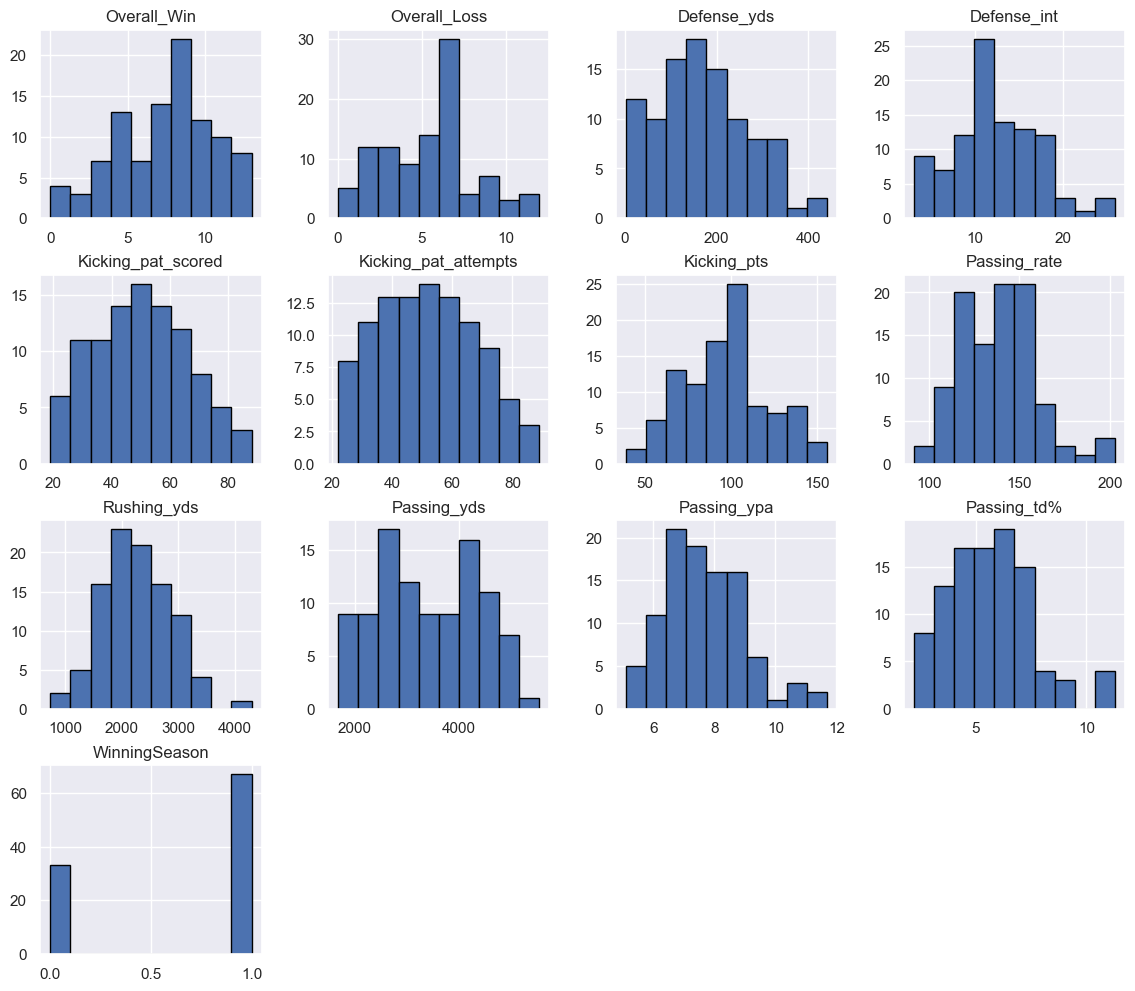

In [15]:
subset_df.hist(edgecolor = 'black',figsize=(14,12))
plt.show()

# Creating the Density Graph

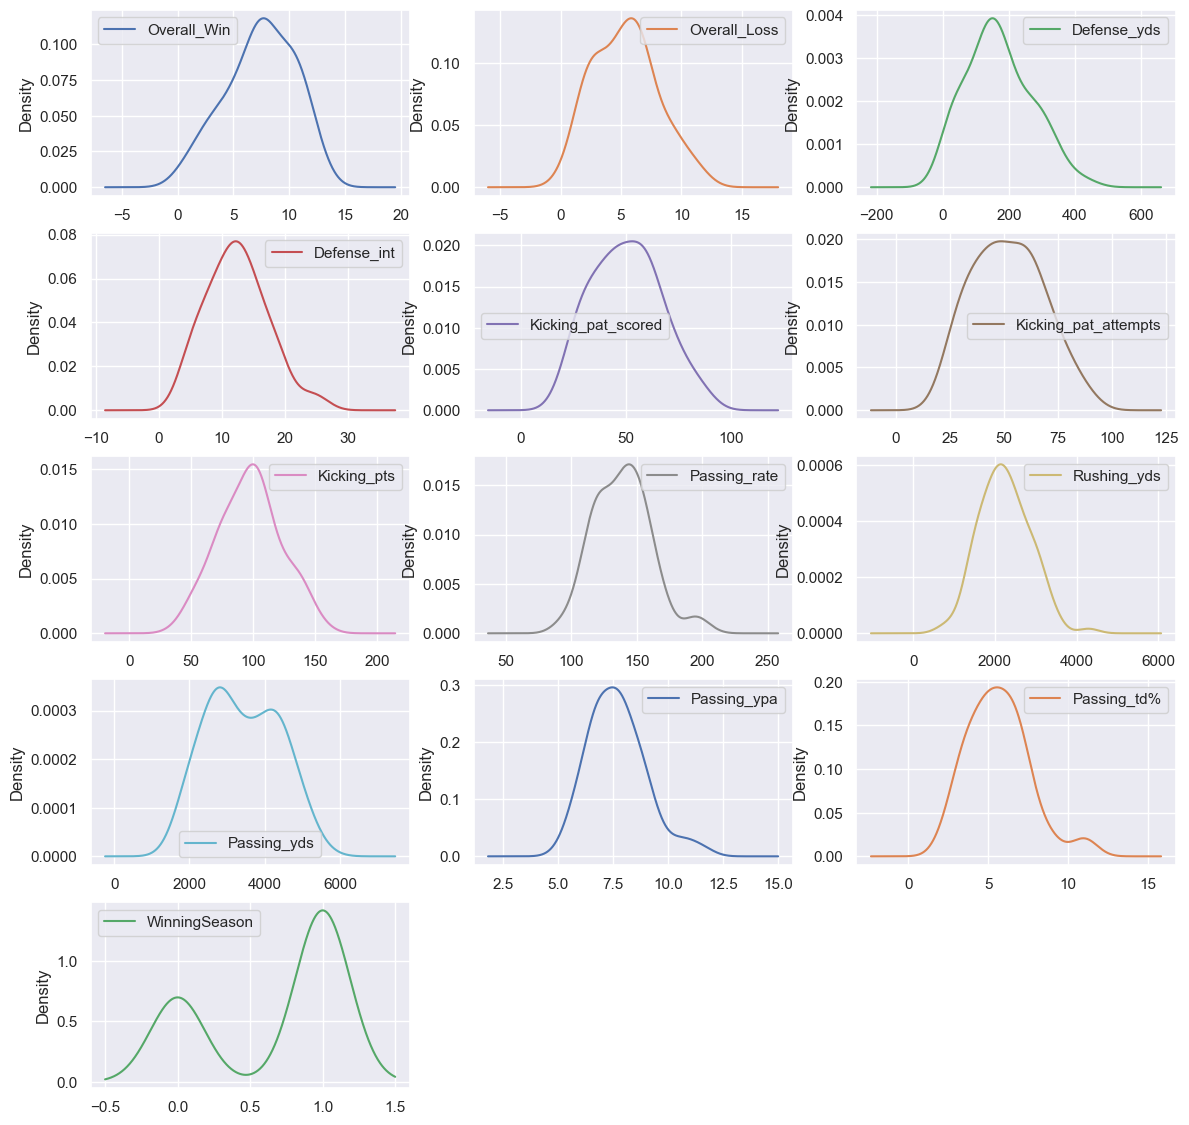

In [16]:
subset_df.plot(kind='density', subplots=True, layout=(5, 3), sharex=False, figsize=(14, 14))
plt.show()


# Creating the box plot

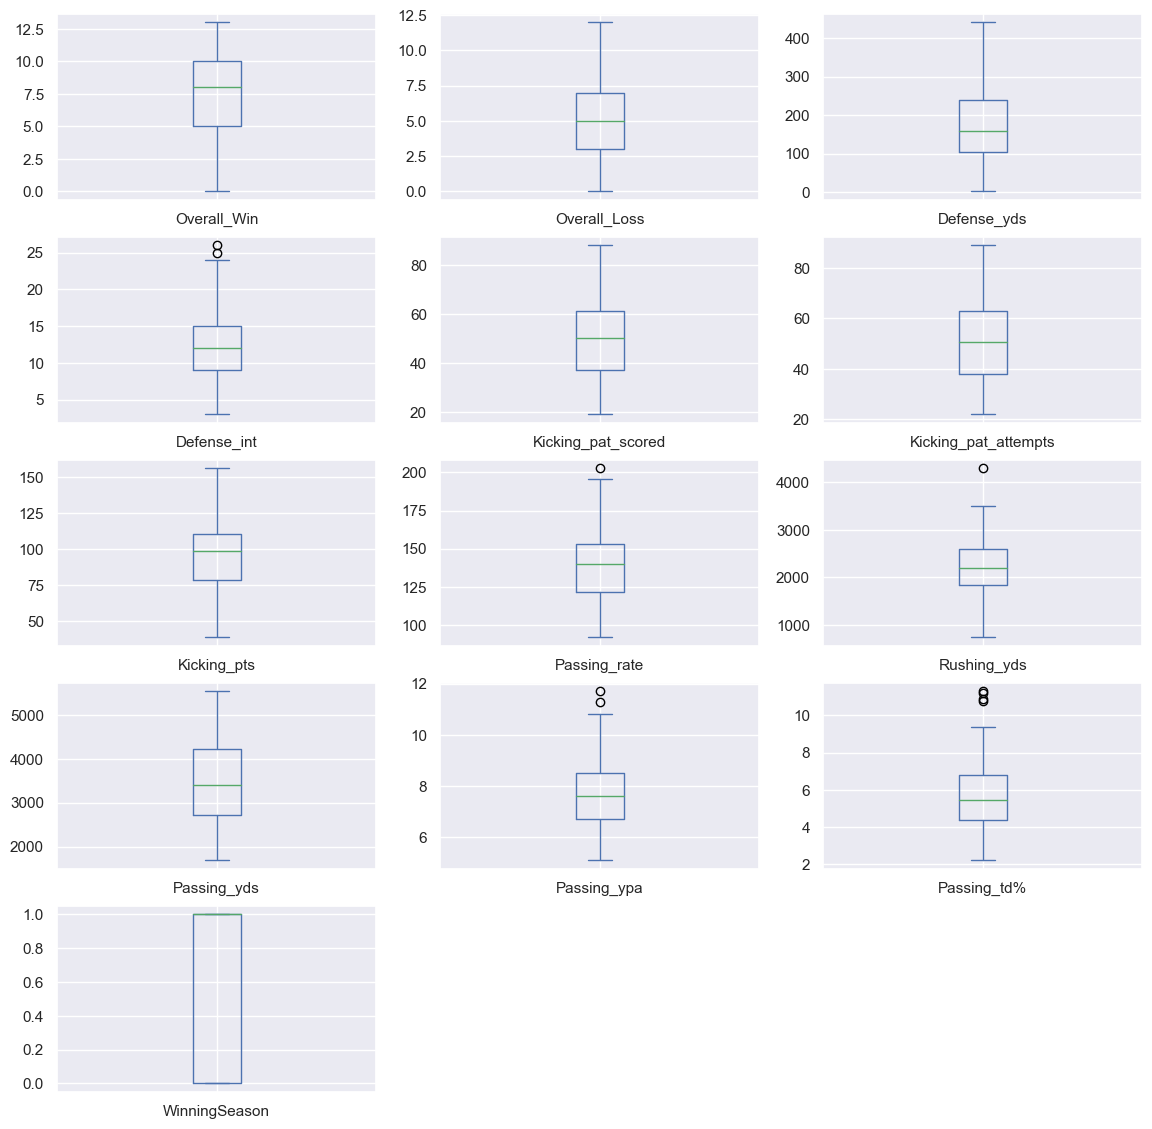

In [17]:
subset_df.plot(kind = 'box' , subplots = True , layout = (5,3) ,sharex = False ,figsize = (14,14))
plt.show()

# Creating Pair Plot

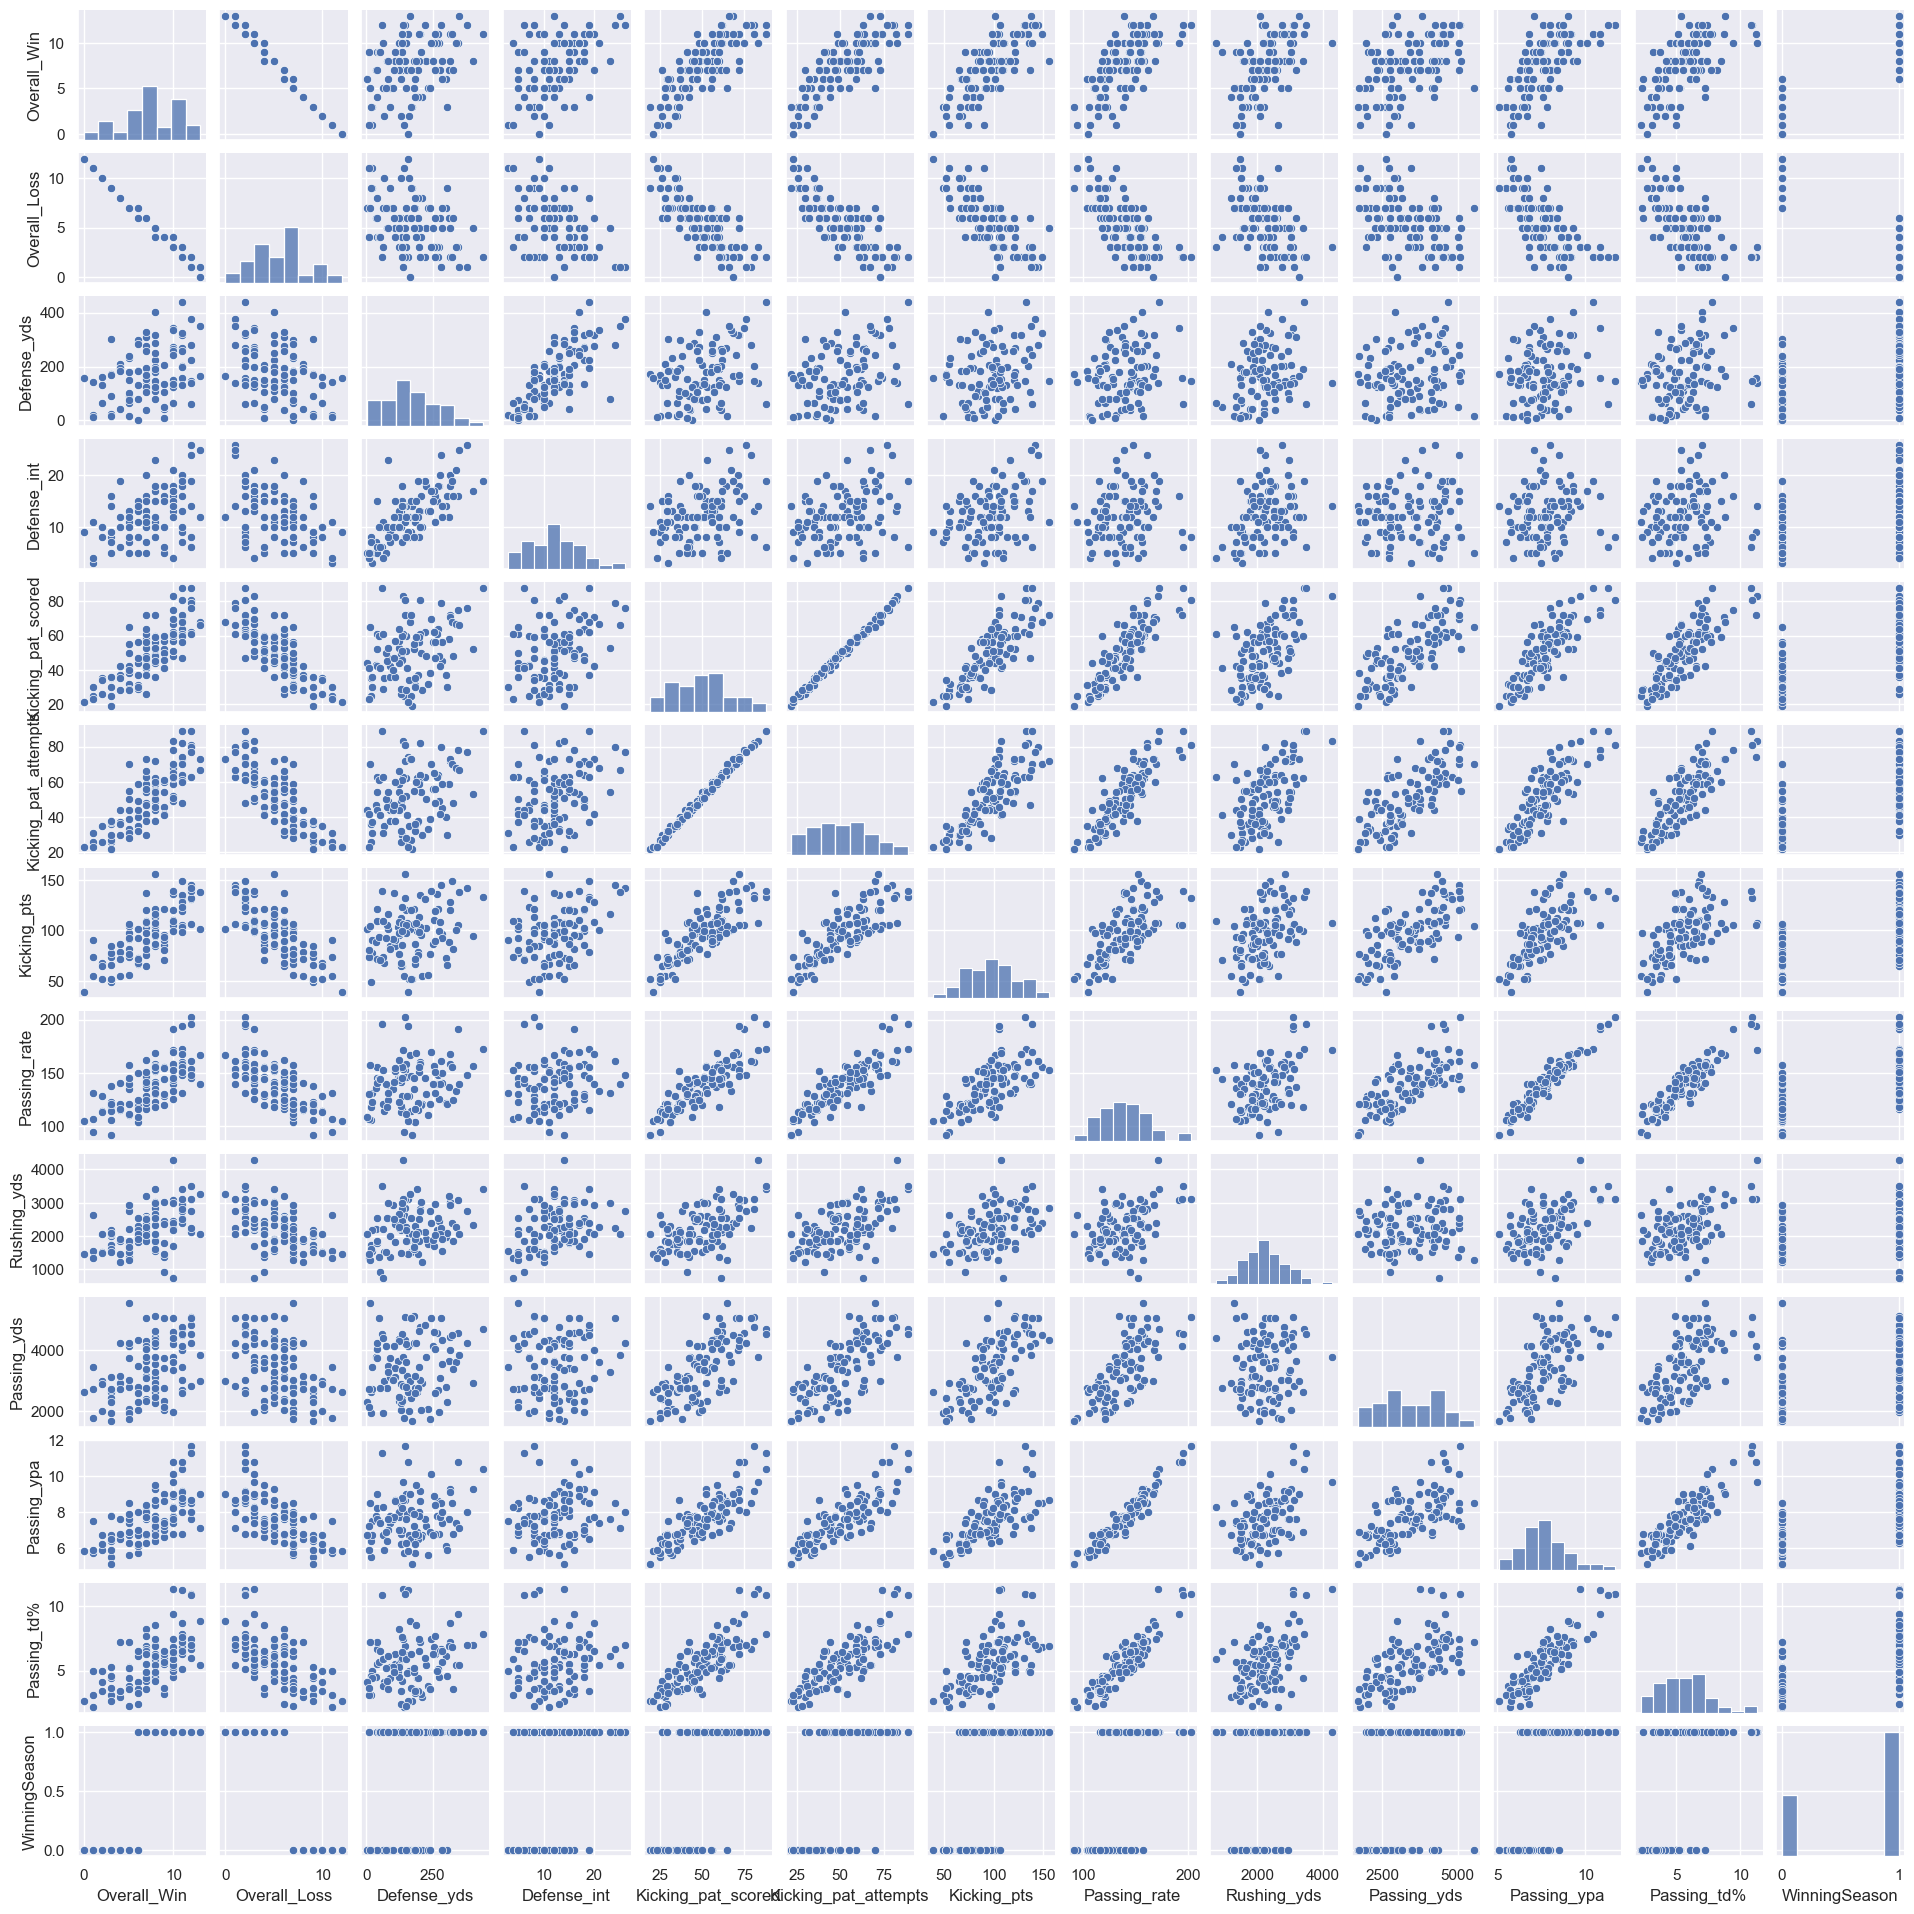

In [18]:
sns.pairplot(subset_df,height =1.5)
plt.show()

# Looking at the correlation

In [19]:
# We will decrease the number of decimal places with the format function.
pd.options.display.float_format = '{:,.3f}'.format

In [20]:
subset_df.loc[:, ['Overall_Win',"Overall_Loss",'Defense_yds',"Defense_int","Kicking_pat_scored", "Kicking_pat_attempts" 
        ,"Kicking_pts" ,"Passing_rate","Rushing_yds" ,"Passing_yds","Passing_td%","WinningSeason"]].corr()

,Overall_Win,Overall_Loss,Defense_yds,Defense_int,Kicking_pat_scored,Kicking_pat_attempts,Kicking_pts,Passing_rate,Rushing_yds,Passing_yds,Passing_td%,WinningSeason
Overall_Win,1.000,-0.993,0.370,0.458,0.791,0.796,0.749,0.690,0.493,0.456,0.632,0.818
Overall_Loss,-0.993,1.000,-0.373,-0.464,-0.790,-0.796,-0.743,-0.693,-0.488,-0.448,-0.630,-0.793
Defense_yds,0.370,-0.373,1.000,0.741,0.348,0.343,0.278,0.203,0.268,0.162,0.207,0.286
Defense_int,0.458,-0.464,0.741,1.000,0.341,0.336,0.373,0.128,0.326,0.088,0.135,0.386
Kicking_pat_scored,0.791,-0.790,0.348,0.341,1.000,0.997,0.822,0.852,0.546,0.736,0.814,0.644
Kicking_pat_attempts,0.796,-0.796,0.343,0.336,0.997,1.000,0.811,0.853,0.550,0.737,0.813,0.640
Kicking_pts,0.749,-0.743,0.278,0.373,0.822,0.811,1.000,0.672,0.431,0.694,0.581,0.623
Passing_rate,0.690,-0.693,0.203,0.128,0.852,0.853,0.672,1.000,0.414,0.711,0.918,0.579
Rushing_yds,0.493,-0.488,0.268,0.326,0.546,0.550,0.431,0.414,1.000,0.061,0.512,0.428
Passing_yds,0.456,-0.448,0.162,0.088,0.736,0.737,0.694,0.711,0.061,1.000,0.621,0.383


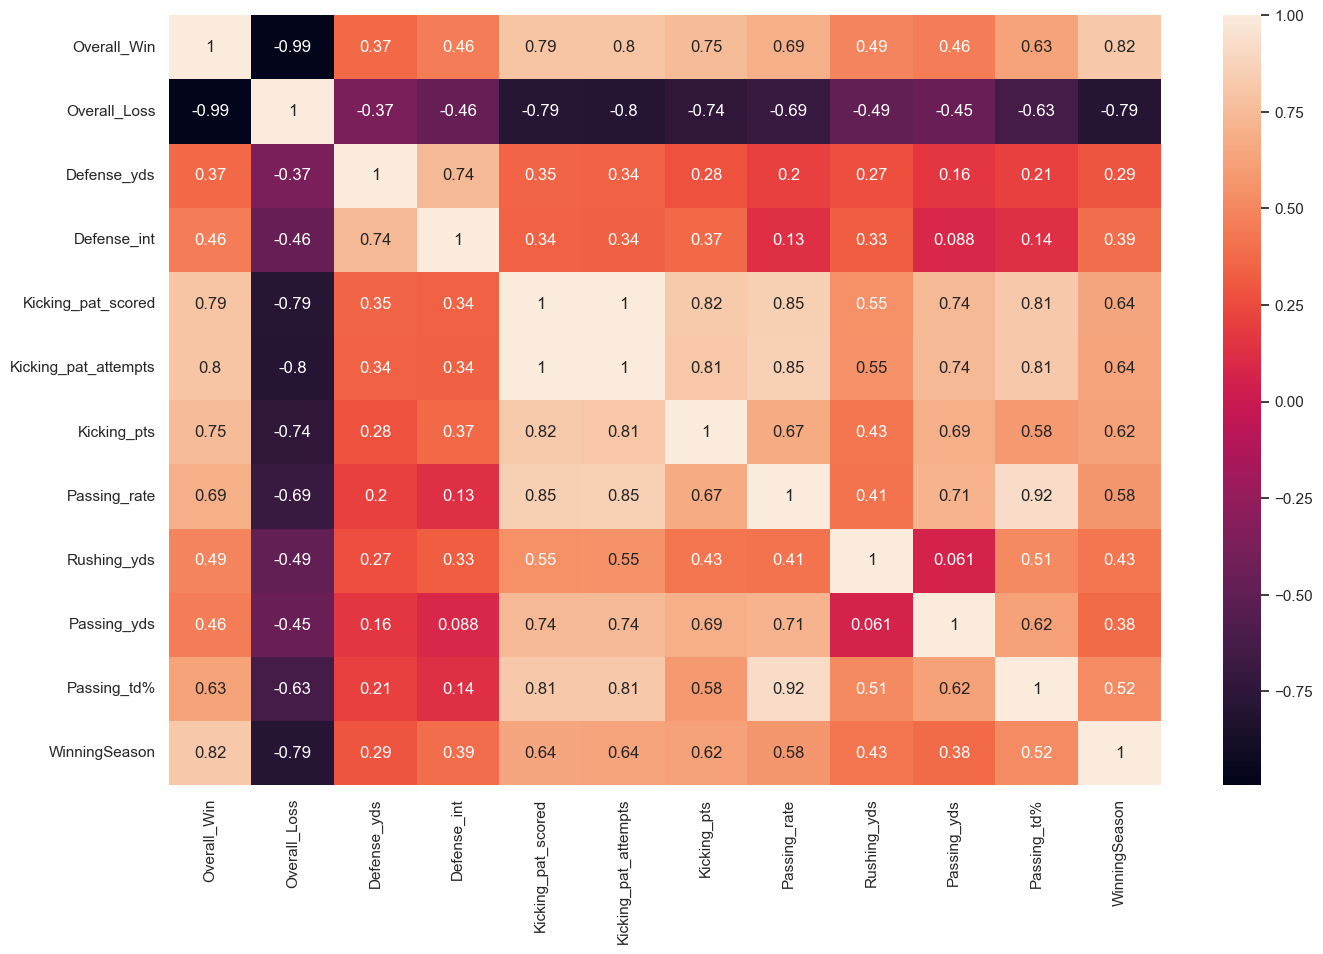

In [21]:
# We could simply look at the correlations, but a heatmap is a great way to present to the general audience.
plt.figure(figsize = (16,10))
sns.heatmap(subset_df.loc[:, ['Overall_Win',"Overall_Loss",'Defense_yds',"Defense_int","Kicking_pat_scored", "Kicking_pat_attempts" 
        ,"Kicking_pts" ,"Passing_rate","Rushing_yds" ,"Passing_yds","Passing_td%","WinningSeason"]].corr(),annot = True)
plt.show()

# Data Split

In [22]:
# Create a new data frame with the columns "Team" and "Year"
X = subset_df.loc[:, ['Overall_Win',"Overall_Loss",'Defense_yds',"Defense_int","Kicking_pat_scored", "Kicking_pat_attempts" 
        ,"Kicking_pts" ,"Passing_rate","Rushing_yds" ,"Passing_yds","Passing_td%","WinningSeason"]]
print(X)

    Overall_Win  Overall_Loss  Defense_yds  Defense_int  Kicking_pat_scored  \
0         4.000         8.000      211.000       10.000              28.000   
1         7.000         6.000      120.000       10.000              46.000   
2        10.000         3.000      344.000       16.000              75.000   
3         8.000         5.000      316.000       18.000              72.000   
4        11.000         2.000      441.000       19.000              88.000   
..          ...           ...          ...          ...                 ...   
95        7.000         6.000      106.000       12.000              47.000   
96        8.000         5.000       80.000       23.000              53.000   
97       10.000         3.000      134.000       14.000              51.000   
98        7.000         6.000      259.000       11.000              56.000   
99        8.000         4.000      189.000       15.000              59.000   

    Kicking_pat_attempts  Kicking_pts  Passing_rate

In [23]:
# Standardize input features to mean=0 and sd=1
scaler = StandardScaler()
X = pd.DataFrame(
    scaler.fit_transform(X),
    columns=[
        'Overall_Win',"Overall_Loss",'Defense_yds',"Defense_int","Kicking_pat_scored", "Kicking_pat_attempts" 
        ,"Kicking_pts" ,"Passing_rate","Rushing_yds" ,"Passing_yds","Passing_td%","WinningSeason"]
)
X.describe().round(2)

,Overall_Win,Overall_Loss,Defense_yds,Defense_int,Kicking_pat_scored,Kicking_pat_attempts,Kicking_pts,Passing_rate,Rushing_yds,Passing_yds,Passing_td%,WinningSeason
count,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
mean,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000
std,1.010,1.010,1.010,1.010,1.010,1.010,1.010,1.010,1.010,1.010,1.010,1.010
min,-2.420,-2.030,-1.710,-1.930,-1.920,-1.820,-2.330,-2.190,-2.440,-1.820,-1.780,-1.420
25%,-0.790,-0.890,-0.660,-0.700,-0.820,-0.840,-0.740,-0.800,-0.660,-0.750,-0.670,-1.420
50%,0.190,-0.130,-0.120,-0.080,-0.020,-0.070,0.050,0.030,-0.070,-0.030,-0.100,0.700
75%,0.840,0.630,0.710,0.530,0.650,0.690,0.540,0.650,0.590,0.840,0.600,0.700
max,1.820,2.520,2.750,2.790,2.310,2.280,2.360,2.960,3.340,2.220,2.930,0.700


In [24]:
X.isnull().sum()

Overall_Win             0
Overall_Loss            0
Defense_yds             0
Defense_int             0
Kicking_pat_scored      0
Kicking_pat_attempts    0
Kicking_pts             0
Passing_rate            0
Rushing_yds             0
Passing_yds             0
Passing_td%             0
WinningSeason           0
dtype: int64

In [25]:
X = X.dropna()
X

,Overall_Win,Overall_Loss,Defense_yds,Defense_int,Kicking_pat_scored,Kicking_pat_attempts,Kicking_pts,Passing_rate,Rushing_yds,Passing_yds,Passing_td%,WinningSeason
0,-1.116,1.004,0.414,-0.494,-1.367,-1.329,-1.687,-0.827,-1.678,-0.539,-1.368,-1.425
1,-0.137,0.246,-0.510,-0.494,-0.265,-0.289,0.235,0.275,0.491,0.239,-0.384,0.702
2,0.842,-0.890,1.764,0.736,1.510,1.608,0.315,2.432,1.361,1.205,1.947,0.702
3,0.189,-0.133,1.480,1.147,1.327,1.241,0.916,0.902,1.280,1.056,0.808,0.702
4,1.169,-1.269,2.749,1.352,2.306,2.281,1.436,1.559,1.910,1.309,1.118,0.702
...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.137,0.246,-0.652,-0.084,-0.204,-0.289,1.596,0.100,0.439,0.734,-0.384,0.702
96,0.189,-0.133,-0.916,2.172,0.163,0.139,0.755,-0.351,1.208,-0.160,0.238,0.702
97,0.842,-0.890,-0.367,0.326,0.041,-0.044,0.075,0.288,1.221,-0.082,0.393,0.702
98,-0.137,0.246,0.901,-0.289,0.347,0.262,-0.325,0.571,-0.347,0.629,1.067,0.702


In [26]:
X = subset_df[['Overall_Win', 'Overall_Loss', 'Defense_yds', 'Defense_int', 'Kicking_pat_scored', 
               'Kicking_pat_attempts', 'Kicking_pts', 'Passing_rate', 'Rushing_yds', 'Passing_yds', 
               'Passing_ypa', 'Passing_td%']]
y = subset_df['WinningSeason']
seed = 123

# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed
)

In [27]:
print(y_train.describe())
print(y_test.describe())

count   70.000
mean     0.700
std      0.462
min      0.000
25%      0.000
50%      1.000
75%      1.000
max      1.000
Name: WinningSeason, dtype: float64
count   30.000
mean     0.600
std      0.498
min      0.000
25%      0.000
50%      1.000
75%      1.000
max      1.000
Name: WinningSeason, dtype: float64


In [28]:
# Fit k-nearest neighbors with k=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=3)

In [29]:
# Fit k-nearest neighbors with k=7
knn7 = KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=7)

In [30]:
# Fit k-nearest neighbors with k=11
knn11 = KNeighborsClassifier(n_neighbors=11)
knn11.fit(X_train, np.ravel(y_train))

KNeighborsClassifier(n_neighbors=11)

In [31]:
# Fit linear support vector classifier
linearSVM = svm.SVC(kernel='linear')
linearSVM.fit(X_train, y_train)

SVC(kernel='linear')

In [32]:
# Fit radial support vector classifier
rbfSVM = svm.SVC(kernel='rbf')
rbfSVM.fit(X_train, y_train)

SVC()

In [33]:
# Fit polynomial support vector classifier
polySVM = svm.SVC(kernel='poly')
polySVM.fit(X_train, y_train)

SVC(kernel='poly')

In [34]:
# Fit polynomial support vector classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

# Accuracy for the Training Score

In [35]:
# Calculate scores on training for all models
train_scores = [
    knn3.score(X_train, y_train),
    knn7.score(X_train, y_train),
    knn11.score(X_train, y_train),
    linearSVM.score(X_train, y_train),
    rbfSVM.score(X_train, y_train),
    polySVM.score(X_train, y_train),
    naive_bayes.score(X_train, y_train)
]

train_scores

[0.8857142857142857,
 0.8714285714285714,
 0.8571428571428571,
 1.0,
 0.8142857142857143,
 0.8285714285714286,
 0.9142857142857143]

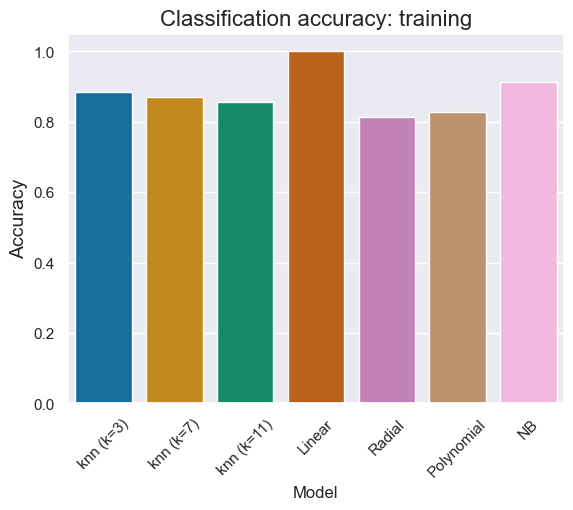

In [36]:
# Plot scores on training for all models
model = ['knn (k=3)', 'knn (k=7)', 'knn (k=11)', 'Linear', 'Radial', 'Polynomial',"NB"]

p = sns.barplot(x=model, y=train_scores, palette='colorblind')
p.set_xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
p.set_ylabel('Accuracy', fontsize=14)
p.set_title('Classification accuracy: training', fontsize=16)
plt.show()

# Accuracy for the testing Score

In [37]:
# Calculate scores on testing for all models
test_scores = [
    knn3.score(X_test, y_test),
    knn7.score(X_test, y_test),
    knn11.score(X_test, y_test),
    linearSVM.score(X_test, y_test),
    rbfSVM.score(X_test, y_test),
    polySVM.score(X_test, y_test),
    naive_bayes.score(X_test, y_test)

]

test_scores

[0.7, 0.7, 0.7, 0.9, 0.7, 0.7666666666666667, 0.9333333333333333]

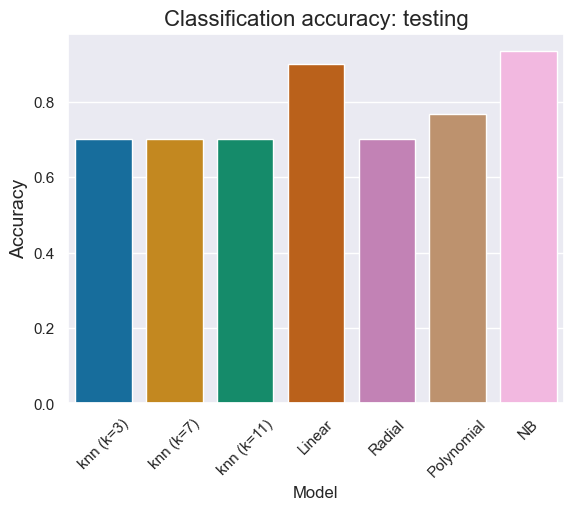

In [38]:
# Plot scores on testing for all models
p = sns.barplot(x=model, y=test_scores, palette='colorblind')
p.set_xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
p.set_ylabel('Accuracy', fontsize=14)
p.set_title('Classification accuracy: testing', fontsize=16)
plt.show()

# Calculating Recall For the testing model

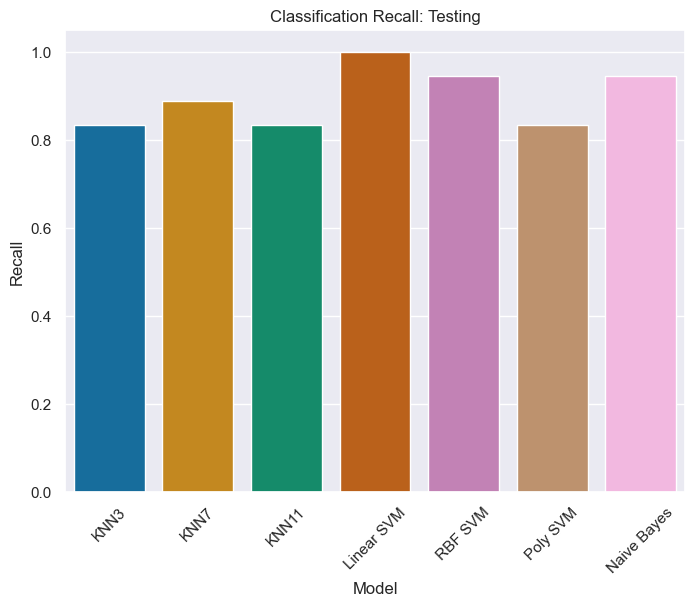

In [45]:
# Define and train the Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)  # Make sure your feature data is appropriately scaled

# Calculate recall on testing for all models
test_recall = [
    recall_score(y_test, knn3.predict(X_test)),
    recall_score(y_test, knn7.predict(X_test)),
    recall_score(y_test, knn11.predict(X_test)),
    recall_score(y_test, linearSVM.predict(X_test)),
    recall_score(y_test, rbfSVM.predict(X_test)),
    recall_score(y_test, polySVM.predict(X_test)),
    recall_score(y_test, naive_bayes.predict(X_test)),
]

# Define model names
models = ['KNN3', 'KNN7', 'KNN11', 'Linear SVM', 'RBF SVM', 'Poly SVM', 'Naive Bayes']

# Plotting the recall scores
plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=test_recall, palette='colorblind')
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Recall', fontsize=12)
plt.title('Classification Recall: Testing', fontsize=12)
plt.show()

In [46]:
test_recall

[0.8333333333333334,
 0.8888888888888888,
 0.8333333333333334,
 1.0,
 0.9444444444444444,
 0.8333333333333334,
 0.9444444444444444]

# Calculating Mean Square Error

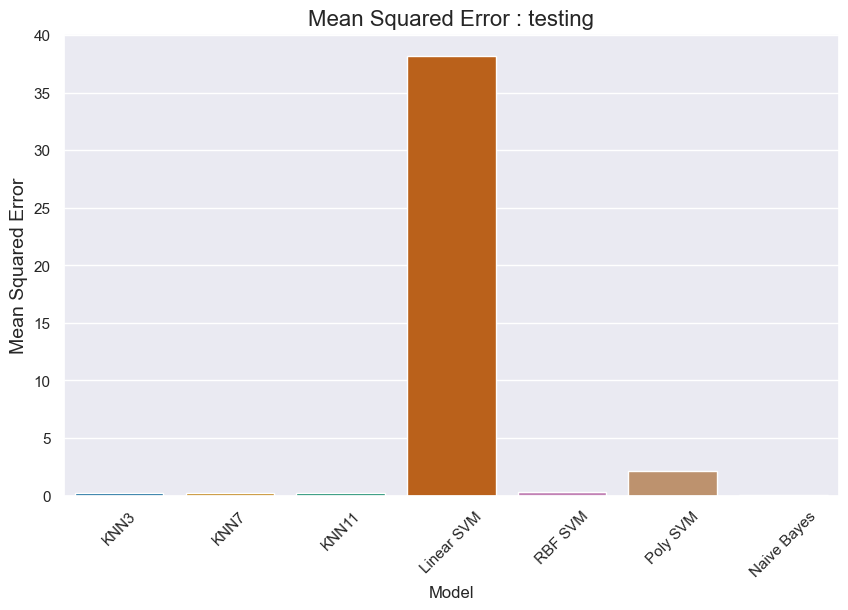

In [55]:
# Predict probabilities for the positive class
y_prob_knn3 = knn3.predict_proba(X_test)[:, 1]
y_prob_knn7 = knn7.predict_proba(X_test)[:, 1]
y_prob_knn11 = knn11.predict_proba(X_test)[:, 1]
y_prob_linearSVM = linearSVM.decision_function(X_test)  # For SVMs, use decision function if predict_proba is not available
y_prob_rbfSVM = rbfSVM.decision_function(X_test)
y_prob_polySVM = polySVM.decision_function(X_test)
y_prob_naive_bayes = naive_bayes.predict_proba(X_test)[:, 1]
# compute MSE
mse_knn3 = mean_squared_error(y_test, y_prob_knn3)
mse_knn7 = mean_squared_error(y_test, y_prob_knn7)
mse_knn11 = mean_squared_error(y_test, y_prob_knn11)
mse_linearSVM = mean_squared_error(y_test, y_prob_linearSVM)
mse_rbfSVM = mean_squared_error(y_test, y_prob_rbfSVM)
mse_polySVM = mean_squared_error(y_test, y_prob_polySVM)
mse_naive_bayes = mean_squared_error(y_test, y_prob_naive_bayes)

# Compile MSEs into a list
mses = [mse_knn3, mse_knn7, mse_knn11, mse_linearSVM, mse_rbfSVM, mse_polySVM, mse_naive_bayes]

# Model names
models = ['KNN3', 'KNN7', 'KNN11', 'Linear SVM', 'RBF SVM', 'Poly SVM', 'Naive Bayes']

# Plotting the MSE
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mses, palette='colorblind')
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('Mean Squared Error : testing', fontsize=16)
plt.show()

In [54]:
mses

[0.19259259259259262,
 0.2061224489795918,
 0.20936639118457298,
 38.202169369374914,
 0.3481839082748462,
 2.160690358960964,
 0.04854126308234457]

# Perfrmance of top 3 and bottom 3 teams

In [47]:
# Perfrmance of the data "Team" wise
team_performance = subset_df.groupby('Team').agg({
    'Overall_Win': 'sum',
    'Overall_Loss': 'sum'
}).sort_values(by='Overall_Win', ascending=False)

# Display top 3 and bottom 3 teams
top_teams = team_performance.head(3)
bottom_teams = team_performance.tail(3)

In [48]:
# Print results
top_teams

,Overall_Win,Overall_Loss
Team,,
OKLA,105.000,28.000
OKST,94.000,36.000
TCU,94.000,36.000


In [49]:
bottom_teams

,Overall_Win,Overall_Loss
Team,,
TTU,65.000,61.000
IAST,51.000,74.000
KAN,23.000,97.000
